<a href="https://colab.research.google.com/github/jessynalani/jessynalani/blob/main/22329264Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22329264 J Macuacua

Datasets links


link = https://www.datafirst.uct.ac.za/dataportal/index.php/catalog/1012/get-microdata

shapeFile = https://dataportal-mdb-sa.opendata.arcgis.com/datasets/b415f05c9d0648bfa2b042aa799059ad/about


the datasets speak about the types of crimes and the number of them crimes commited in a specifiv location and the shapefile helps me will locating the specific point to where the crime is committed

Importing all the neccessary libraries

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import joblib
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from prophet import Prophet

loading the two datasets

In [ ]:
path = '/content/drive/MyDrive/Final_Exam/sapsacr-2008-2023-v1.csv'
sapsacr = pd.read_csv(path)

path_2 = '/content/drive/MyDrive/Final_Exam/sa-census-2022-geography-v1.csv'
census = pd.read_csv(path_2)

In [ ]:
sapsacr.head()

,date,other_theft,arson,assault_gbh,attempted_murder,attempted_sexoff,bank_robbery,burglary_nonres,burglary_res,carjacking,commercial_crime,common_assault,common_robbery,contact_sexoff,dui,drug_crime,illegal_firearms,kidnapping,malicious_damage,murder,rape,robbery_nonres,robbery_res,cash_transit_robbery,aggr_robbery,sexual_assault,sexual_offences,police_detected_sexoff,shoplifting,stock_theft,vehicle_theft,theft_from_vehicle,truck_hijacking,station,longitude,latitude
0,2008/2009,491,3,570,25,3,0,104,226,25,161,443,132,51.0,213,113,34,NaN,236,24,58,34,42,1,293,7,119,0,218,0,143,272,0,yeoville,28.06281,-26.1829
1,2009/2010,452,5,625,9,3,0,86,180,35,154,473,127,44.0,264,283,22,NaN,252,14,55,27,57,1,276,13,115,0,185,0,124,300,0,yeoville,28.06281,-26.1829
2,2010/2011,525,1,586,15,5,0,83,231,23,247,469,113,13.0,228,108,10,NaN,208,21,60,36,27,0,238,23,101,0,164,0,96,256,0,yeoville,28.06281,-26.1829
3,2011/2012,559,2,591,18,5,0,92,199,54,197,437,103,2.0,340,161,18,NaN,210,10,42,54,46,0,328,3,52,1,111,0,104,243,0,yeoville,28.06281,-26.1829
4,2012/2013,562,0,556,29,5,0,73,210,48,129,441,134,3.0,351,155,28,NaN,262,17,71,51,56,1,355,17,96,3,133,0,136,380,0,yeoville,28.06281,-26.1829


Finding null value in the sapsacr dataset

In [ ]:
sapsacr.isnull().sum()

,0
date,0
other_theft,0
arson,0
assault_gbh,0
attempted_murder,0
attempted_sexoff,0
bank_robbery,0
burglary_nonres,0
burglary_res,0
carjacking,0


filling in the missing values in the 3 columns with the mode

In [ ]:
cols_to_fill = ['contact_sexoff','kidnapping', 'longitude', 'latitude']

for col in cols_to_fill:
    most_common_value = sapsacr[col].mode()[0]
    sapsacr[col] = sapsacr[col].fillna(most_common_value)


sapsacr.isnull().sum()

,0
date,0
other_theft,0
arson,0
assault_gbh,0
attempted_murder,0
attempted_sexoff,0
bank_robbery,0
burglary_nonres,0
burglary_res,0
carjacking,0


Looking at the first 5 rows of the census dataset

In [ ]:
census.head()

,QID,Province,District,Municipality,Geo_type
0,10000003,Western Cape,1. CPT,1. CPT,Urban area
1,10000005,Western Cape,1. CPT,1. CPT,Urban area
2,10000008,Western Cape,40. DC4,18. WC043,Urban area
3,10000018,Western Cape,1. CPT,1. CPT,Urban area
4,10000024,Western Cape,1. CPT,1. CPT,Urban area


looking for null value in the census dataset

In [ ]:
census.isnull().sum()

,0
QID,0
Province,0
District,0
Municipality,0
Geo_type,0


# Visualising the **Data**

making the date into a single similar formate to avoid error when creating the graphs by replacing the "/" with the "-" in each row

In [ ]:
sapsacr['date'] = sapsacr['date'].str.replace('/', '-', regex=False)

In [ ]:
sapsacr['year'] = sapsacr['date'].str.split('-').str[0].astype(int)
major_crimes = ['murder', 'rape', 'robbery_res', 'burglary_res']
crime_trends = sapsacr.groupby('year')[major_crimes].sum().reset_index()

Looking at the trend of growth in the major crimes throught the years this will help us to clearly see how the crimes pattern has changed and that which crimes have fallen or risen

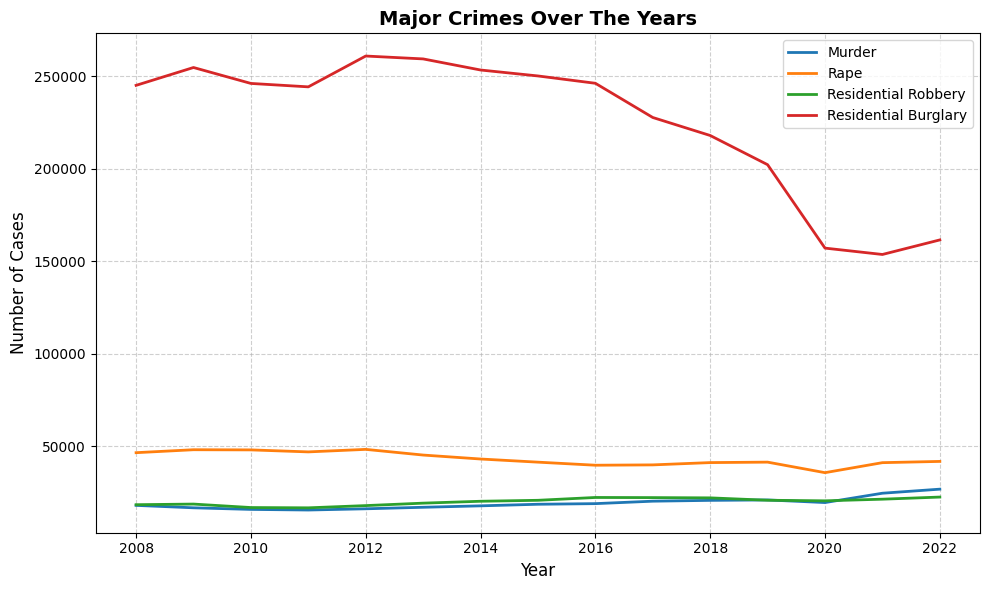

In [ ]:
crime_trends = df.groupby('year')[['murder', 'rape', 'robbery_res', 'burglary_res']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(crime_trends['year'], crime_trends['murder'], label='Murder', linewidth=2)
plt.plot(crime_trends['year'], crime_trends['rape'], label='Rape', linewidth=2)
plt.plot(crime_trends['year'], crime_trends['robbery_res'], label='Residential Robbery', linewidth=2)
plt.plot(crime_trends['year'], crime_trends['burglary_res'], label='Residential Burglary', linewidth=2)

plt.title("Major Crimes Over The Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Pie Chart: with the lables on the side for a clear view

using the pie chart with help in showing which crime contribute the most to the total crime activity

Selecting all the crimes that will be included and grouping them

In [ ]:
major_crimes = ['murder', 'rape', 'robbery_res', 'burglary_res','other_theft', 'arson', 'assault_gbh', 'attempted_murder',
       'attempted_sexoff', 'bank_robbery', 'burglary_nonres', 'burglary_res',
       'carjacking', 'commercial_crime', 'common_assault', 'common_robbery',
       'contact_sexoff', 'dui', 'drug_crime', 'illegal_firearms', 'kidnapping',
       'malicious_damage', 'murder', 'rape', 'robbery_nonres', 'robbery_res',
       'cash_transit_robbery', 'aggr_robbery', 'sexual_assault',
       'sexual_offences', 'police_detected_sexoff', 'shoplifting',
       'stock_theft', 'vehicle_theft', 'theft_from_vehicle', 'truck_hijacking']

In [ ]:
crime_totals = sapsacr[major_crimes].sum()

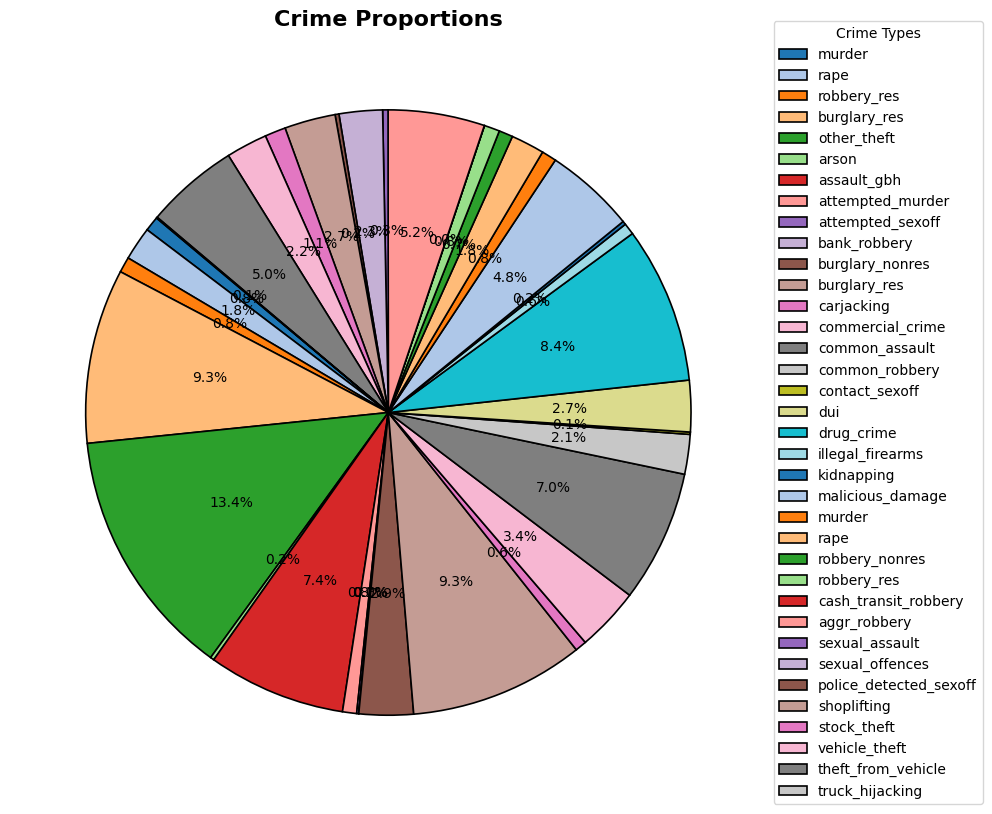

In [ ]:
colors = plt.cm.tab20.colors

plt.figure(figsize=(10, 10))
plt.pie(crime_totals,
        labels=None,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors[:len(crime_totals)],
        wedgeprops={'edgecolor':'black', 'linewidth':1.2})


plt.legend(crime_totals.index,
           title="Crime Types",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           fontsize=10)

plt.title("Crime Proportions", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Heat Map
Shows how different crimes relate to each other.

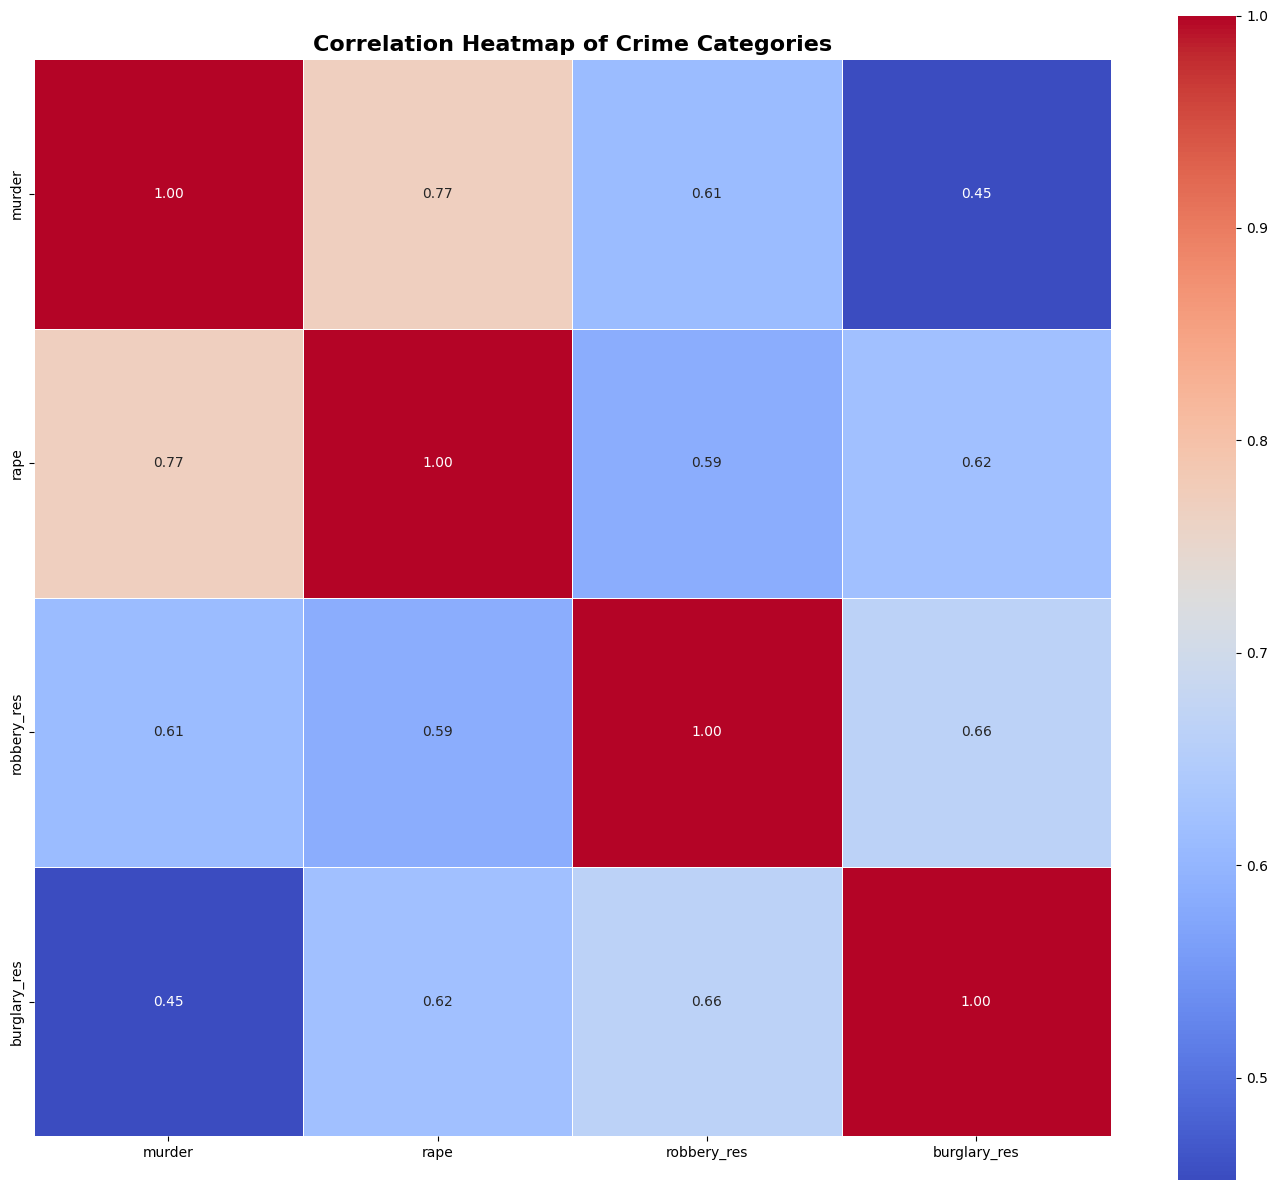

In [25]:
corr_matrix = sapsacr[major_crimes].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            cbar=True,
            square=True,
            linewidths=0.5)

plt.title("Correlation Heatmap of Crime Categories", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Sctter Plot
Shows where crimes occur geographically. This can highlight hotspot areas.

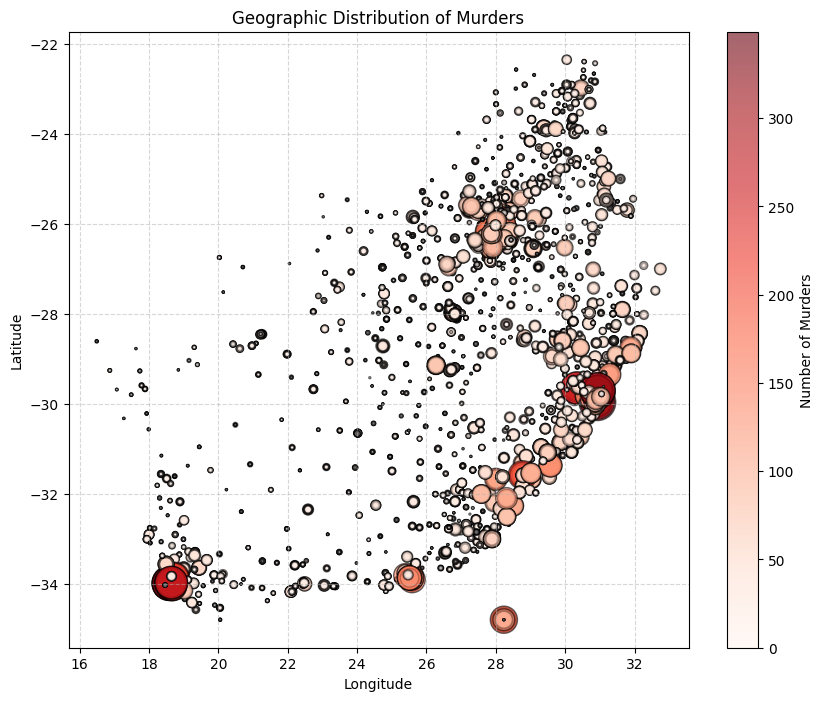

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(sapsacr['longitude'], sapsacr['latitude'],
            s=sapsacr['murder']*2,  # scale size by crime count
            c=sapsacr['murder'], cmap='Reds', alpha=0.6, edgecolor='k')
plt.colorbar(label='Number of Murders')
plt.title('Geographic Distribution of Murders')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Horizontal bar chart

Identify most frequent crimes and their distribution

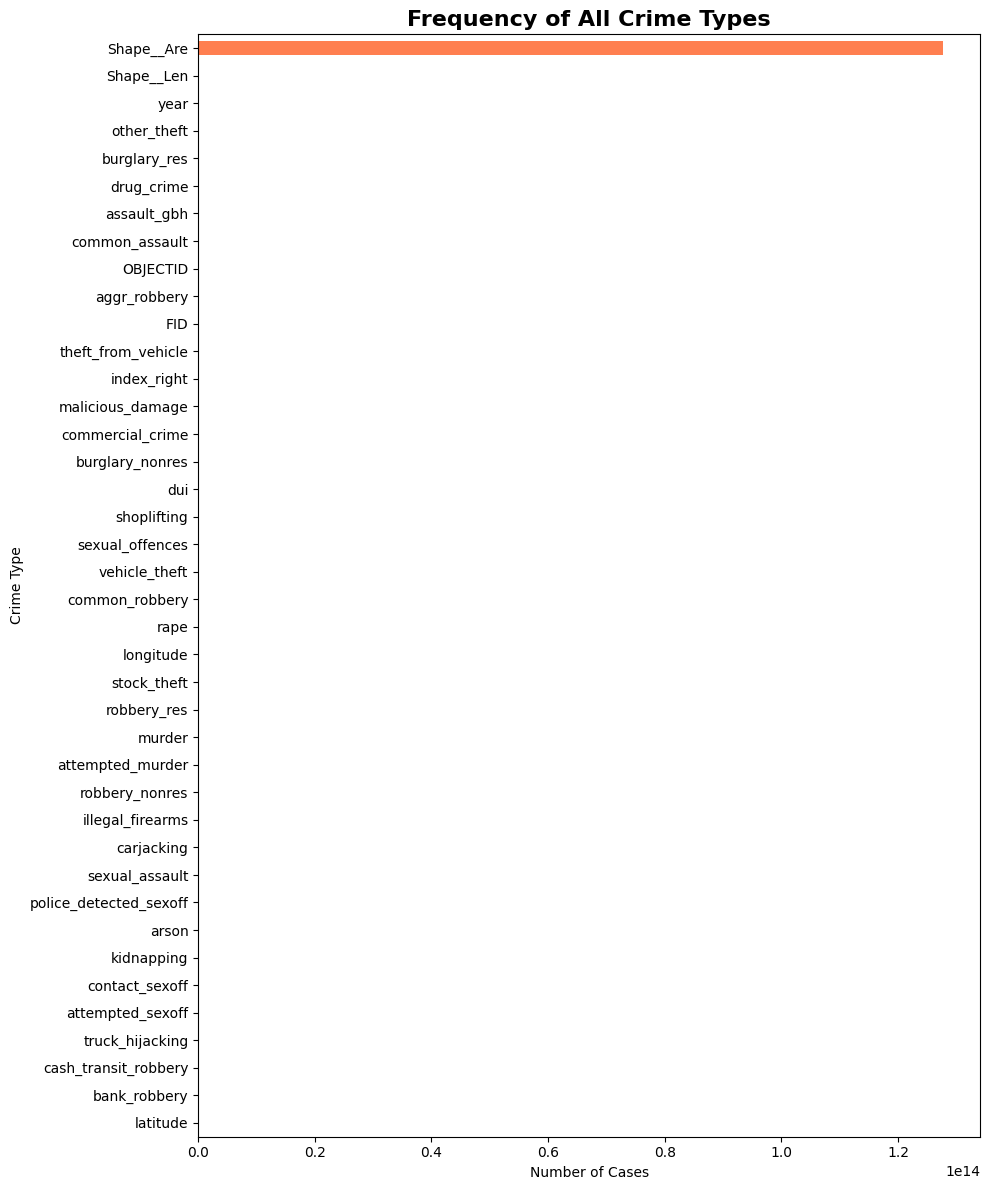

In [26]:
numeric_cols = sapsacr.select_dtypes(include='number').columns

crime_totals = sapsacr[numeric_cols].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 12))
crime_totals.plot(kind='barh', color='coral')
plt.title('Frequency of All Crime Types', fontsize=16, fontweight='bold')
plt.xlabel('Number of Cases')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()

Stacked line chart

Show yearly trends of violent vs property crimes, helpful for hotspot temporal patterns.

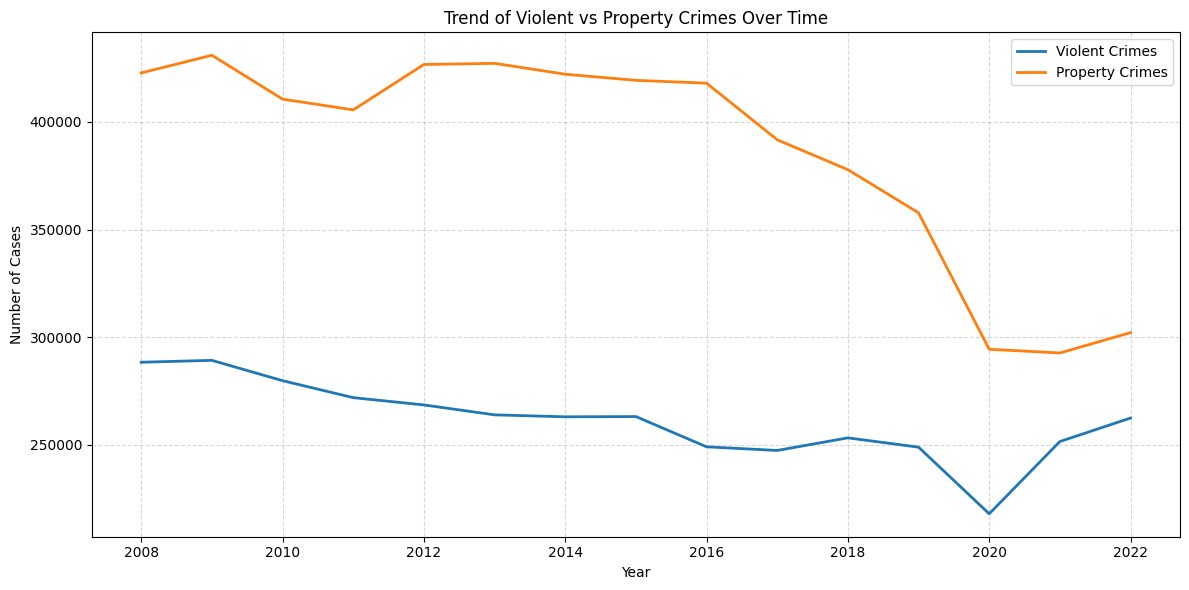

In [27]:
sapsacr['year'] = sapsacr['date'].str.replace('/', '-').str.split('-').str[0].astype(int)


violent = ['murder', 'assault_gbh', 'rape', 'attempted_murder', 'attempted_sexoff']
property_ = ['burglary_res', 'burglary_nonres', 'robbery_res', 'robbery_nonres', 'vehicle_theft']

crime_trends = sapsacr.groupby('year')[violent + property_].sum()
crime_trends['Violent'] = crime_trends[violent].sum(axis=1)
crime_trends['Property'] = crime_trends[property_].sum(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(crime_trends.index, crime_trends['Violent'], label='Violent Crimes', linewidth=2)
plt.plot(crime_trends.index, crime_trends['Property'], label='Property Crimes', linewidth=2)
plt.title('Trend of Violent vs Property Crimes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Bar chart
Identify which police stations report the highest criminal activity and potential hotspots.

In [28]:
numeric_cols = sapsacr.select_dtypes(include='number').columns
sapsacr['total_crimes'] = sapsacr[numeric_cols].sum(axis=1)

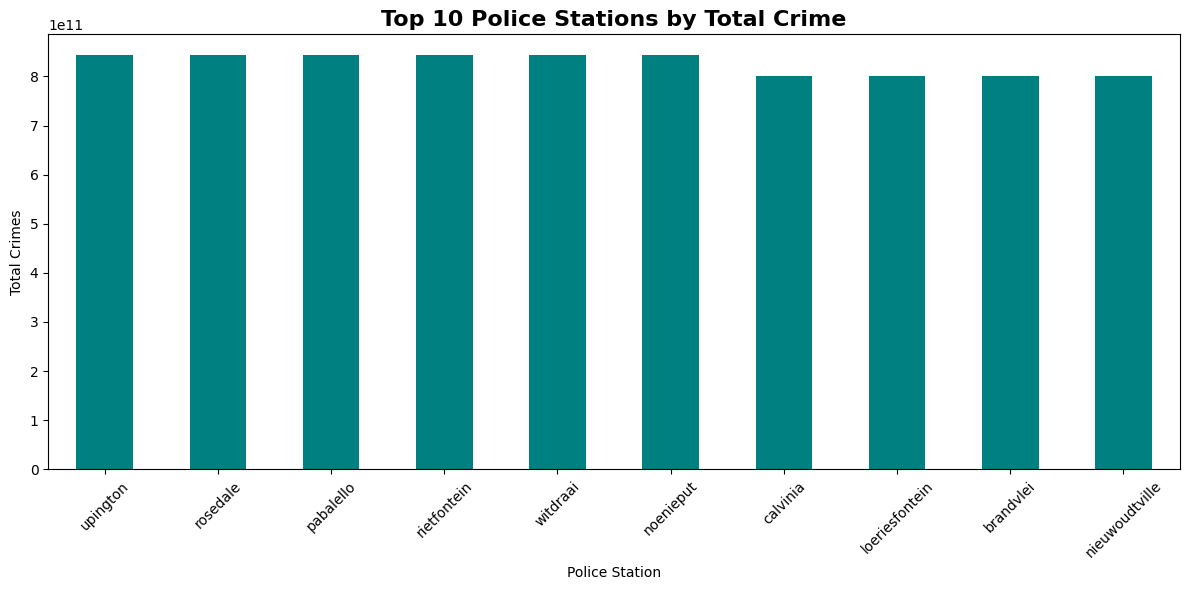

In [29]:
station_totals = sapsacr.groupby('station')['total_crimes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
station_totals.plot(kind='bar', color='teal')
plt.title('Top 10 Police Stations by Total Crime', fontsize=16, fontweight='bold')
plt.ylabel('Total Crimes')
plt.xlabel('Police Station')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Merging the Datasets

Merging the dataset using a shapefile

In [23]:
sapsacr['MUNICNAME'] = 'Location'
municipalities_gdf = gpd.read_file('/content/drive/MyDrive/Final_Exam/MDB_Local_Municipal_Boundary_2018.shp')

geometry = [Point(xy) for xy in zip(sapsacr["longitude"], sapsacr["latitude"])]
sapsacr_gdf = gpd.GeoDataFrame(sapsacr, geometry=geometry)

sapsacr_gdf.set_crs('EPSG:4326', inplace=True)

municipalities_gdf = municipalities_gdf.to_crs(sapsacr_gdf.crs)

sapsacr = gpd.sjoin(sapsacr_gdf, municipalities_gdf, how="left", predicate="within")


sapsacr = gpd.sjoin(sapsacr_gdf, municipalities_gdf, how="left", predicate="within")

sapsacr["Municipality"] = sapsacr["MUNICNAME"]

sapsacr.drop(columns=["geometry"], inplace=True)

KeyError: 'MUNICNAME'

**Clusification of Crime Hotsport**

sum up the crime municipality

In [30]:
sapsacr['total_crimes'] = sapsacr.drop(columns=['date','station','longitude','latitude','Municipality']).sum(axis=1)

municipality_crimes = sapsacr.groupby('Municipality')['total_crimes'].sum().reset_index()

KeyError: "['Municipality'] not found in axis"

define hotspots based on the top quantile

In [ ]:
threshold = municipality_crimes['total_crimes'].quantile(0.75)
municipality_crimes['hotspot'] = (municipality_crimes['total_crimes'] >= threshold).astype(int)


municipality_crimes.head()

In [ ]:
X = municipality_crimes[['total_crimes']]
y = municipality_crimes['hotspot']

spliting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Using Random Foresting to train the model

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

adding the predictions back on to the datasets

In [ ]:
municipality_crimes['predicted_hotspot'] = model.predict(X)

sapsacr = sapsacr.merge(municipality_crimes[['Municipality','predicted_hotspot']], on='Municipality', how='left')

**Forcasting Crime Trends over time**

choose a chategory

In [ ]:
crime_category = 'Theft'

finding total time by month

In [ ]:
sapsacr['date'] = pd.to_datetime(sapsacr['date'])

monthly_crimes = sapsacr.groupby(pd.Grouper(key='date', freq='M'))[crime_category].sum().reset_index()
monthly_crimes.set_index('date', inplace=True)

monthly_crimes.head()

creating a profet dataframe

In [ ]:
df_prophet = monthly_crimes.reset_index().rename(columns={'date':'ds', crime_category:'y'})


Initialize th model

In [ ]:
model = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_prophet)


forcast the next 12 months

In [ ]:
future = model.make_future_dataframe(periods=24, freq='M')
forecast = model.predict(future)

visualizing the forcast

In [ ]:
fig1 = model.plot(forecast)
plt.title(f'Forecast for {crime_category} Crimes')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

The shaded area in the plot shows the % confidence interval.

this will make seeing the the forecasted months and uncertainty clear

# **Summery**

note that due to the error tha occured in the merging procces and the lack of time I had the other codes will have problem but I have show the approach I was going for

I found two datasets one the types of crime and the latitude and longitude the other one with the geographic areas I than went to find a shapefile to help me with locating the procists location of each location using the longitude and latitude so that I can merge the datasets

Using the crime records, which included location and type of crime, we mapped each crime to its respective municipality.

I then aggregated the total crimes for each municipality and identified hotspots—areas with the highest concentrations of crime.

A classification model was built to predict whether a municipality is likely to be a hotspot based on crime patterns.


Which means we can now classify areas as high-risk or low-risk, helping law enforcement focus resources where they are needed most.

Hotspot maps make it easy to visualize problem areas at a glance.


Forecasting Crime Trends

We selected specific crime categories, such as theft or assault, and aggregated the number of incidents per month.

Using a forecasting model, we predicted the expected number of crimes for the next 12 to 24 months.

The forecast includes confidence intervals, which indicate the range within which we expect future crime levels to fall.

Police can anticipate periods when certain crimes are likely to increase. This allows for better planning and proactive measures to prevent crime spikes.

#Drone Programing

**Visiting the hotsports**

Each areahas a crime intensity score.You classify areas as hotspot if their score is above a chosen threshold and we can find the relavent threashold by computing the average crime count across all areas the adding a margin and any place above that is a hotspot.

defining the threshold
threshold = df["Crime_Count"].mean() + df["Crime_Count"].std()
df["Hotspot"] = df["Crime_Count"] >= threshold

Row1: Stock_theft = 35 → Not Hotspot
Row2: rape = 92 → Hotspot
Row3: murder = 65 → Not Hotspot

this will show only the areas with unusually high crime counts get flagged and The output gives us these hotspot coordinates to a drone simulation as Points of Interest (POIs).

 **3D Frame of Hotspots**

once the locations of the hotspotsare identified we want to represent them in a 3D

Coordinate System:

X, Y = latitude/longitude that will be  projected to a flat plane (UTM projection is common).

Z = altitude and it can be constant if drone flies at a fixed height.

Visualization Tools in Python:

matplotlib (Axes3D for 3D scatter).

plotly (interactive 3D).

code snippets:
hotspots = [(0,0,10), (20,5,10), (15,15,10), (30,10,10)]  # example coords

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = zip(*hotspots)
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Altitude")



**Generating Waypoints and Path Planning**

Once hotspots are defined, we must plan a traversal path.
 Simple Patterns

Lawnmower Pattern (Grid Sweep): Useful for area coverage.

eg

def nearest_neighbor_path(points, start_index=0):
    points = np.array(points)
    n = len(points)
    visited = [start_index]
    unvisited = set(range(n)) - {start_index}
    
    while unvisited:
        last = visited[-1]
        next_city = min(unvisited, key=lambda i: np.linalg.norm(points[last]-points[i]))
        visited.append(next_city)
        unvisited.remove(next_city)
    
    return [points[i] for i in visited]

hotspots = [(0,0,10), (20,5,10), (15,15,10), (30,10,10)]
path = nearest_neighbor_path(hotspots)
print("Planned path:", path)